In [569]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import tarfile
import pandas as pd
from pandas.api.types import is_numeric_dtype
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [570]:
pd.set_option('display.max_columns', None)

In [571]:
#Load tar.gz file into Python
#We are using day 1 of 7

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")

In [572]:
#Extracting filename from TarInfo object
#Gives name of file - can be regular data file or directory 

tar.next()

tn = tar.next()
print(tn.name)

tn1 = tar.next()
print(tn1.name)

tn2 = tar.next()
print(tn2.name)

tn3 = tar.next()
print(tn3.name)

tn4 = tar.next()
print(tn4.name)

tn5 = tar.next()
print(tn5.name)

tn6 = tar.next()
print(tn6.name)

tn7 = tar.next()
print(tn7.name)

tn8 = tar.next()
print(tn8.name)

hitdata7days/visitday=10/0017_part_00.parquet
hitdata7days/visitday=10/0050_part_00.parquet
hitdata7days/visitday=10/0049_part_00.parquet
hitdata7days/visitday=10/0033_part_00.parquet
hitdata7days/visitday=10/0001_part_00.parquet
hitdata7days/visitday=10/0018_part_00.parquet
hitdata7days/visitday=10/0083_part_00.parquet
hitdata7days/visitday=10/0065_part_00.parquet
hitdata7days/visitday=10/0117_part_00.parquet


In [573]:
#Read in parquet file as pandas DataFrame
#Turns parquet file into data frame

df = pd.read_parquet(tn.name)

df1 = pd.read_parquet(tn1.name)

df2 = pd.read_parquet(tn2.name)

df3 = pd.read_parquet(tn3.name)

df4 = pd.read_parquet(tn4.name)

df5 = pd.read_parquet(tn5.name)

df6 = pd.read_parquet(tn6.name)

df7 = pd.read_parquet(tn7.name)

df8 = pd.read_parquet(tn8.name)

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8])

In [574]:
#function useful to see variable value counts of a specific column... 
#i.e. for device type how many tablets, desktops, etc...

def seeValues(data, category):

    counts = pd.DataFrame(data.groupby([category])[category].count())

    counts.rename(columns={category: 'counts'}, inplace=True,)

    counts = counts.sort_values(['counts'], ascending=[0])

    graph = counts.reset_index()

    return graph

In [575]:
#get master list of visit ids that resulted in a purchase

#use to create target variable later

ids_purchase = (df[df['checkoutthankyouflag'] == 1])['visitid'].drop_duplicates()

ids_purchase = ids_purchase.tolist()

In [576]:
#create DF w only beginning hit of the visit

#filter by checking when sevrer call time matches visit start time

df_first_visit = df[df['visitpagenum']==1]

In [577]:
#add target variable - assings value 1 if visit resulted in a purchase; 0 if not

target = list()

for ids in df_first_visit['visitid']:
    
    if ids in ids_purchase:
        
        target.append("1")
        
    else:
        
        target.append("0")
        
df_first_visit.insert(0, "target", target)

In [578]:
#see data frame

df_first_visit.head(1)

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
2,1,18604605529,hit_data_fingerhutcomprod_2022-12-10.tsv,5671072,FDM,1533756043552163863,1461829721036809584,2,2022-12-10 18:09:30,2022-12-10,12,2022,12,50,1670717370,ss,"en-US,en;q=0.9","20113=210,20538=200,20539=200,20540=0,20541=0,...",U,66.91.127.62,0,None,None,None,https://www.fingerhut.com/,index,None,None,None,index,index,index,index,index,None,None,None,None,35,NotEligibleToEnroll,None,https://www.fingerhut.com/,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Prospect,None,None,None,Prospect,34c39cfc32704327ae5c14862b11208d,None,None,None,None,None,None,None,None,None,FreshStart,None,None,None,None,None,None,None,HI,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,96749,683,0,None,None,None,None,None,1063982382,625,1366,Y,N,Y,2,2,

In [579]:
#add eventlist length variable 

df_first_visit['eventlistlength'] = df_first_visit.eventlist.str.count(',')

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_20767/903795835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_visit['eventlistlength'] = df_first_visit.eventlist.str.count(',')


In [580]:
# manually remove redundant variables, useless variables. or variables we did not want to weigh highly - such as date

removed = ['hitdatahistorymkey', 'filename', 'linenumber', 'visitoridhigh', 'visitoridlow', 'hit_time_gmt',
          'visitdatetime', 'postttimeinfo', 'visitdate', 'visitmonth', 'visitid', 'fiscalyear', 'fiscalweeknumber', 
          'fiscalmonthnumber', 'visitstarttimegmt', 'checkoutthankyouflag', 'cookieid', 'lasthittimegmt', 'firsthittimegmt', 
          'lastpurchasetimegmt', 'updatedloaddate', 'initialloaddate']

In [581]:
#store selected features in this list 

features = df_first_visit.columns.to_list()

In [582]:
#how many initial variables

#minus 1 for the target

len(features) - 1

284

In [583]:
#remove variables that we manually specified

for variables in df_first_visit.columns:
    
    if variables in removed:
        
        features.remove(variables) 

In [584]:
#how many variables remain after manual removal

#minus 1 for the target

len(features) - 1

262

In [585]:
#create dataframe with remaining va first manual subsetting

df_first_subset = df_first_visit[features]

In [586]:
#data frame for percent of non-null values of each variable for PURCHASE VISITS

purchase_percent = pd.DataFrame()

df_first_visit_purchases = df_first_subset[df_first_visit['visitid'].isin(ids_purchase)]

In [587]:
#store percent null values for PURCHASE VISITS

for names in df_first_visit_purchases.columns:
    
    purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_20767/2451441757.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]


In [588]:
#convert to percent missing values

purchase_percent = abs(purchase_percent - 100) 

In [589]:
#see values

purchase_percent

,target,brandcode,visitnumber,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,javascript,language_0001,os,plugins,resolution,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,devicetype,eventlistlength
0,0.0,0.0,0.0,0.0,0.041841,0.041841,0.0,0.0,0.0,99.958159,72.175732,100.0,0.0,0.0,89.456067,100.0,100.0,29.372385,29.372385,29.372385,29.372385,11.882845,96.569038,92.426778,100.0,100.0,27.866109,37.740586,100.0,9.623431,100.0,100.0,100.0,100.0,100.0,100.0,99.916318,99.916318,99.790795,100.0,100.0,100.0,100.0,100.0,98.577406,15.983264,100.0,100.0,100.0,37.238494,9.623431,100.0,99.456067,98.995816,39.958159,100.0,99.916318,99.916318,95.39749,100.0,20.585774,99.246862,100.0,100.0,100.0,100.0,99.790795,99.539749,37.238494,0.0,37.238494,0.0,0.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,21.67364,27.866109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,96.569038,92.259414,87.112971,85.648536,99.539749,100.0,9.623431,15.983264,99.456067,99.665272,99.916318,94.895397,100.0,95.146444,99.205021,100.0,95.146444,19.707113,39.330544,94.560669,100.0,61.757322,25.606695,100.0,29.916318,37.238494,99.330544,93.556485,98.661088,96.820084,100.0,100.0,99.539749,52.51046,77.90795,29.20502

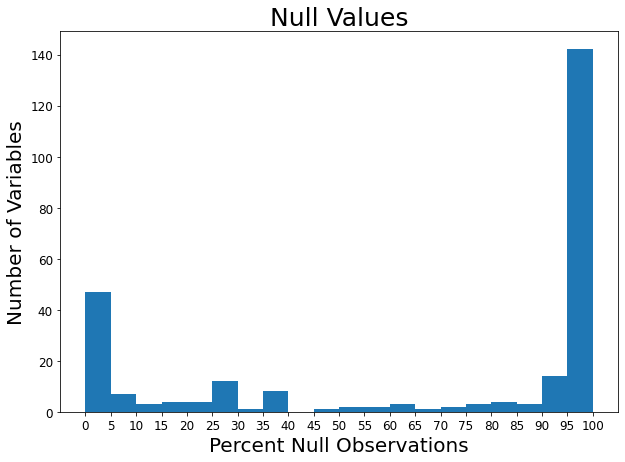

In [590]:
#histogram of missing value variable frequency for PURCHASE VISITS

fig, ax = plt.subplots(figsize =(10, 7))

ax.hist((purchase_percent.iloc[0,:]), bins = range(0,105,5))

plt.title("Null Values", fontsize = 25)
plt.xlabel("Percent Null Observations", fontsize = 20)
plt.ylabel("Number of Variables", fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=15)

plt.xticks(np.arange(0, 105, 5))

plt.savefig("missing_variables")

In [591]:
#Based on histogram distribution, we store features with a 95% or more missing values

for names in purchase_percent.columns:
    
    if (purchase_percent[names][0]) >= 95:

        features.remove(names)

In [592]:
#how many features left after removing features w 95% missing values

#minus 1 for the target

len(features) - 1

120

In [593]:
#subset data frame with selected features

df_second_subset = df_first_subset[features]

In [594]:
df_second_subset.head(1)

,target,brandcode,visitnumber,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,myaccountengagement,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,excludehit,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,javascript,language_0001,os,resolution,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,promocode,evar23,evar24,evar25,scene7,evar28,addonsymal,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,devicetype,eventlistlength
2,1,FDM,2,ss,"en-US,en;q=0.9","20113=210,20538=200,20539=200,20540=0,20541=0,...",U,66.91.127.62,0,None,https://www.fingerhut.com/,index,None,index,index,index,index,index,None,35,NotEligibleToEnroll,https://www.fingerhut.com/,Prospect,Prospect,34c39cfc32704327ae5c14862b11208d,None,FreshStart,HI,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,96749,683,0,1063982382,625,1366,Y,N,Y,2,2,300,rr.com,7,45,1240087047,185,0,index,index,683,1,0,hilo,usa,hi,0,1,1,1,0,0,None,None,None,https://www.fingerhut.com/,3966320789,None,3966320789,FRSHST01 : 12,None,None,None,None,FET,None,None,SL2_Automated_Audience_Footwear,so_targeting : FreshStart,FreshStart,None,0,None,None,None,None,https://www.fingerhut.com/,3966320789,3966320789,FRSHST01 : 12,None,Organic,None,None,FET,None,None,SL2_Automated_Audience_Footwear,so_targeting : FreshStart,FreshStart,None,0,None,None,0,None,0,0,None,index,None,so612_cms,lg,None,None,None,None,None,None,None,Desktop,26.0


In [596]:
#Next step: variance threshold

#manual listed every numeric variable

numeric = ['visitnumber', 'postbrowserheight', 'postbrowserwidth', 'lastpurchasenum', 'addonsymal', 'cdedspomodel',
          'myaccountengagement', 'post_evar46', 'eventlistlength']

In [597]:
#convert all numeric variables to numeric type

for names in df_second_subset.columns:
    
    if names in numeric:
        
        df_second_subset[names] = pd.to_numeric(df_second_subset[names]).convert_dtypes() 

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_20767/1482898130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_second_subset[names] = pd.to_numeric(df_second_subset[names]).convert_dtypes()


In [598]:
df_second_subset[numeric].dtypes

visitnumber              Int64
postbrowserheight        Int64
postbrowserwidth         Int64
lastpurchasenum          Int64
addonsymal             Float64
cdedspomodel             Int64
myaccountengagement      Int64
post_evar46              Int64
eventlistlength          Int64
dtype: object

In [599]:
#fill all categorical variables missing values with a string "None"

#creates new category for missing values

for names in df_second_subset.columns:
    
    if ((is_numeric_dtype(df_second_subset[names]))) != True:
        
        df_second_subset[names] = df_second_subset[names].fillna("None")

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_20767/3054911166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_second_subset[names] = df_second_subset[names].fillna("None")


In [600]:
#variance threshold; 3rd subset step

#get rid of variables with very low variance i.e. same value every time

#prepare categorical variables

ord_enc = OrdinalEncoder()

variance_train_categorical = df_second_subset.loc[:, ~df_second_subset.columns.isin(numeric)]

variance_transformed_categorical = ord_enc.fit_transform(variance_train_categorical)

#prepare numeric variables

variance_train_numeric = df_second_subset.loc[:, df_second_subset.columns.isin(numeric)]

In [601]:
#using a threshold of 0.01 would mean dropping the column where 99% of the values are similar

#categorical

var_thr_categorical = VarianceThreshold(threshold = 0.01) 

var_thr_categorical.fit(variance_transformed_categorical)

#numeric

var_thr_numeric = VarianceThreshold(threshold = 0.01) 

var_thr_numeric.fit(variance_train_numeric)

VarianceThreshold(threshold=0.01)

In [602]:
#create new feature list after variance threshold

categorical_features = (variance_train_categorical.loc[:,var_thr_categorical.get_support()]).columns.to_list()

numeric_features = (variance_train_numeric.loc[:,var_thr_numeric.get_support()]).columns.to_list()

features = categorical_features + numeric_features

In [604]:
#how many features remain after variance threshold

#minus 1 for target

len(features) - 1

108

In [605]:
#dataset after variance threshold

df_third_subset = df_second_subset[features]

In [606]:
df_third_subset.head(1)

,target,service,acceptlanguage,eventlist,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,browser,color,connectiontype,country,domain,language_0001,os,resolution,firsthitpagename,visitstartpagename,visitsearchengine,geocity,geocountry,georegion,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,promocode,evar23,evar24,evar25,scene7,evar28,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicktag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,devicetype,visitnumber,myaccountengagement,postbrowserheight,postbrowserwidth,lastpurchasenum,addonsymal,cdedspomodel,post_evar46,eventlistlength
2,1,ss,"en-US,en;q=0.9","20113=210,20538=200,20539=200,20540=0,20541=0,...",66.91.127.62,0,None,https://www.fingerhut.com/,index,None,index,index,index,index,index,None,NotEligibleToEnroll,https://www.fingerhut.com/,Prospect,Prospect,34c39cfc32704327ae5c14862b11208d,None,FreshStart,HI,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,96749,683,1063982382,2,2,300,rr.com,45,1240087047,185,index,index,683,hilo,usa,hi,1,1,0,0,None,None,None,https://www.fingerhut.com/,3966320789,None,3966320789,FRSHST01 : 12,None,None,None,FET,None,None,SL2_Automated_Audience_Footwear,so_targeting : FreshStart,FreshStart,None,None,None,None,None,https://www.fingerhut.com/,3966320789,3966320789,FRSHST01 : 12,None,Organic,None,None,FET,None,None,SL2_Automated_Audience_Footwear,so_targeting : FreshStart,FreshStart,None,None,None,0,None,0,None,index,None,so612_cms,lg,None,None,None,None,None,None,None,Desktop,2,35,625,1366,0,<NA>,0,0,26


In [607]:
#the variables removed from variance threshold

removed = (variance_train_categorical.loc[:,~var_thr_categorical.get_support()]).columns.to_list() + (variance_train_numeric.loc[:,~var_thr_numeric.get_support()]).columns.to_list()

removed

['brandcode',
 'homepage',
 'excludehit',
 'postcookies',
 'postjavaenabled',
 'postpersistentcookie',
 'javascript',
 'visitpagenum',
 'prevpage',
 'duplicatepurchase',
 'newvisit',
 'clicksourceid']

In [743]:
#4th subset and final - random forest feature importance

#Class weights are balanced

clf = RandomForestClassifier(random_state = 23)

In [744]:
#Create test and train sets 95/5 split

X_train, X_test, y_train, y_test = train_test_split(df_third_subset.iloc[:,:], 
                                                    df_third_subset['target'], 
                                                    test_size=0.05,
                                                    random_state = 23)

In [745]:
#undersample train set

#get all of the purchase visits

X_train_1 = X_train[X_train['target'] == "1"]

y_train_1 = X_train_1['target']

#randomly sample non-purchase visits

X_train_2 = X_train[X_train['target'] == "0"].sample(n = len(X_train_1), random_state = 23)

y_train_2 = X_train_2['target']

#remove target from X and concatenate the purchase and non-purchase observations

X_train = (pd.concat([X_train_1, X_train_2])).iloc[:,1:]

y_train = pd.concat([y_train_1, y_train_2])

#remove target from test set

X_test = X_test.iloc[:,1:]

In [746]:
#observations in test set

len(X_test)

2154

In [747]:
#observations in train set

len(X_train)

4550

In [748]:
#seperate categorical and numerical values

X_train_categorical = X_train.loc[:, ~X_train.columns.isin(numeric)]

X_train_numerical = X_train.loc[:, X_train.columns.isin(numeric)]

X_test_categorical = X_test.loc[:, ~X_test.columns.isin(numeric)]

X_test_numerical = X_test.loc[:, X_test.columns.isin(numeric)]

In [749]:
#encode categorical varaibles with leave one out encoder

#first format target variable

ord_enc = OrdinalEncoder()

y_train_transformed = ord_enc.fit_transform(y_train.to_numpy().reshape(-1,1))

#then fit leave one out encoder

targ_enc = LeaveOneOutEncoder()

targ_enc.fit(X_train_categorical, y_train_transformed)

#and transform test and training with same encoder

X_train_categorical_transformed = targ_enc.transform(X_train_categorical)

X_test_categorical_transformed = targ_enc.transform(X_test_categorical)

#lastly format test target too

y_test_transformed = ord_enc.fit_transform(y_test.to_numpy().reshape(-1,1))

In [750]:
#numerical variables 

# scale using min max scaler

scaler = MinMaxScaler()

X_train_numerical_transformed = scaler.fit_transform(X_train_numerical)

X_test_numerical_transformed = scaler.transform(X_test_numerical)

In [751]:
#fill NAs for numerical

X_train_numerical_transformed = pd.DataFrame(X_train_numerical_transformed, columns = X_train_numerical.columns.to_list())

X_train_numerical_transformed = X_train_numerical_transformed.fillna(-999)

X_test_numerical_transformed = pd.DataFrame(X_test_numerical_transformed, columns = X_train_numerical.columns.to_list())

X_test_numerical_transformed = X_test_numerical_transformed.fillna(-999)

In [752]:
#change everything to float32 for max precision for random forrest classifier 

X_train_numerical_transformed = X_train_numerical_transformed.astype('float32')

X_train_categorical_transformed = X_train_categorical_transformed.astype('float32')

X_test_numerical_transformed = X_test_numerical_transformed.astype('float32')

X_test_categorical_transformed = X_test_categorical_transformed.astype('float32')

In [753]:
#concatenate numerical and categorical variables for train and test sets 

X_train_total_transformed = np.concatenate([X_train_categorical_transformed.to_numpy(), X_train_numerical_transformed.to_numpy()], axis=1)

X_test_total_transformed = np.concatenate([X_test_categorical_transformed.to_numpy(), X_test_numerical_transformed.to_numpy()], axis=1)

In [754]:
#fit the model

clf.fit(X_train_total_transformed, y_train_transformed)

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_20767/3123354395.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_total_transformed, y_train_transformed)


RandomForestClassifier(random_state=23)

In [755]:
#accuracy of classifier on test set

clf.score(X_test_total_transformed, y_test_transformed)

0.691736304549675

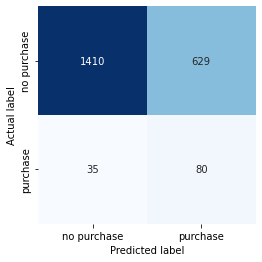

In [756]:
#confusion matrix for test set

y_predicted = clf.predict(X_test_total_transformed)

labels = ['no purchase', 'purchase']

sns.heatmap(confusion_matrix(y_test_transformed, y_predicted), 
            square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [728]:
#print out the features and importances

feat_list = []

total_importance = 0

# Get the name and MDI importance of each feature

for feature in zip(X_train_categorical.columns.append(X_train_numerical.columns), clf.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

# create DataFrame sorted with most important features and with cumulative sum of importances

df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()


#top 5 feature importances

df_imp.head(5)

,FEATURE,IMPORTANCE,CUMSUM
37,geocity,0.077053,0.077053
68,post_evar23,0.049018,0.126071
73,post_evar30,0.047328,0.173400
23,useragent,0.037850,0.211249
93,evar83,0.028954,0.240204


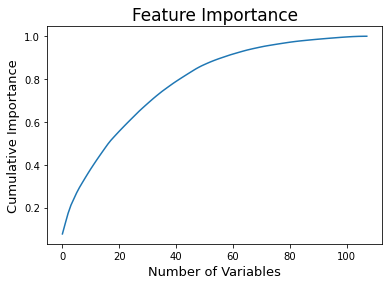

In [623]:
#plot to see how many variables we should take

#curve flattens at around 40 and it becomes diminishing returns so 40 is a good number

#accounts for about 80% of importance

plt.plot(range(0,len(df_imp),1), df_imp['CUMSUM']) 

plt.title("Feature Importance", fontsize = 17)
plt.xlabel('Number of Variables', fontsize = 13)
plt.ylabel('Cumulative Importance', fontsize = 13)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

plt.savefig("feature_importance")

plt.show()

In [624]:
#take top 40 features plus target

features = ['target'] + df_imp['FEATURE'].head(40).to_list() 

In [625]:
#proportion of importance accounted for by top 40 variables

df_imp['CUMSUM'].iloc[39]

0.7806608637423661

In [626]:
#how many features remain after feature importance subsetting

#minus 1 for target

len(features)

41

In [627]:
#FINAL DATA SET

df_fourth_subset = df_third_subset[features]

In [628]:
#NOTE: categorical variables have category for null values

#NOTE: numeric variables are of type numeric 

#NOTE: numeric variables have some NAs, but categorical variables DO NOT

df_fourth_subset.head(1)

,target,geocity,post_evar23,post_evar30,useragent,evar83,zip,visitnumber,domain,evar24,georegion,post_evar24,post_evar33,crosssoldproduct,postbrowserheight,subcategory2,institutionid,eventlist,resolution,post_evar43,os,subcategory,evar28,addonsymal,pagename,postbrowserwidth,visitstartpagename,myaccountengagement,eventlistlength,pagecategory,browser,category,evar56,post_evar13,firsthitpagename,post_evar28,prop44,state,evar23,emailsubscriptionremove,prop29
2,1,hilo,3966320789,None,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,96749,2,rr.com,FRSHST01 : 12,hi,FRSHST01 : 12,FET,3966320789,625,index,so_targeting : FreshStart,"20113=210,20538=200,20539=200,20540=0,20541=0,...",185,so_targeting : FreshStart,1240087047,index,None,<NA>,index,1366,index,35,26,index,1063982382,index,index,3966320789,index,None,FreshStart,HI,3966320789,https://www.fingerhut.com/,Prospect
